In [17]:
# Import Deps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
# Load dat
train_dat = pd.read_csv('data/train.csv')
test_dat = pd.read_csv('data/test.csv')

In [11]:
# Quick EDA - training data

#train_dat.info()
#train_dat.head()
train_dat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Quick EDA - test data

#test_dat.info()
#test_dat.head()
test_dat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


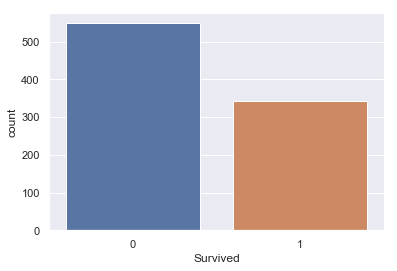

In [20]:
# Plot 1 - Survival ratio

sns.set()
sns.countplot(x='Survived', data=train_dat)

In [40]:
# Simplest Model:

survival_rate = train_dat.Survived.sum() / train_dat.Survived.count()
print('Accuracy for a \'predict everyone dies\' model: {}%'.format(100 * np.round(1 - survival_rate, decimals=3)))

# Export this model and submit it to kaggle

#test_dat['Survived'] = 0
#test_dat[['PassengerId', 'Survived']].to_csv('everybody_dies.csv', index=False)


Accuracy for a 'predict everyone dies' model: 61.6%


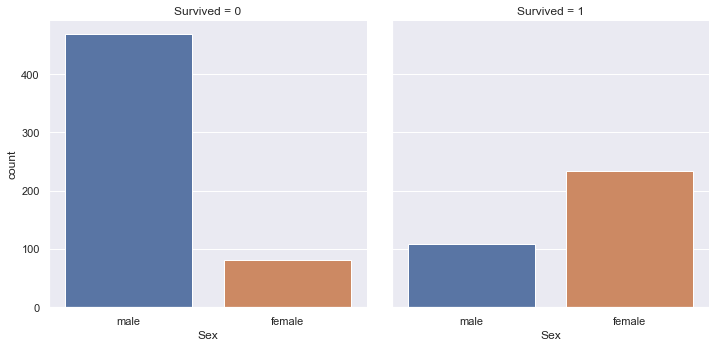

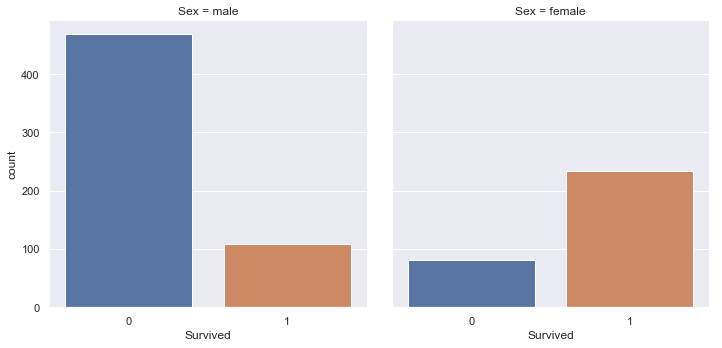

In [147]:
# More EDA:

sns.catplot(x='Sex', col='Survived', kind='count', data=train_dat)
sns.catplot(x='Survived', col='Sex', kind='count', data=train_dat)


In [148]:
#train_dat.groupby(['Survived','Sex']).count()

sex_groups = train_dat.groupby(['Survived','Sex'])
sex_group_survival = g['Survived'].count()
#print(sex_group_survival)

females = train_dat[train_dat.Sex == 'female']
female_survived = females['Survived'].sum()
female_total = females.Survived.count()
print('Female survival: {}%'.format(100 * np.round(female_survived / female_total, decimals=3)))

males = train_dat[train_dat.Sex == 'male']
male_survived = males['Survived'].sum()
male_total = males['Survived'].sum()
male_total = males.Survived.count()
print('Male survival: {}%'.format(100 * np.round(male_survived / male_total,decimals=3)))

# Export this model and submit it to kaggle

#test_dat['Survived'] = test_dat.Sex == 'female'
#test_dat['Survived'] = test_dat.Survived.apply(lambda x: int(x))
#test_dat[['PassengerId', 'Survived']].to_csv('all_the_men_die.csv', index=False)

Female survival: 74.2%
Male survival: 18.9%


Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891


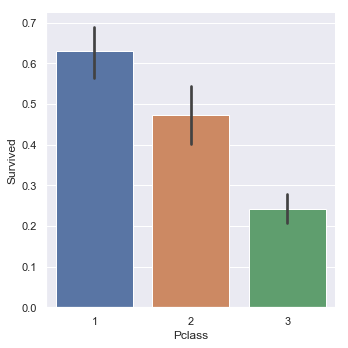

In [301]:
ct = pd.crosstab(train_dat.Pclass, train_dat.Survived, margins=True)

print(ct)

sns.catplot('Pclass', 'Survived', data=train_dat, kind='bar')

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891


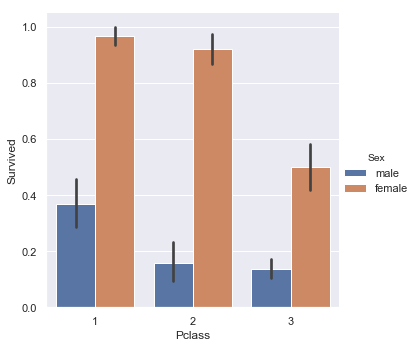

In [314]:
sns.catplot('Pclass', 'Survived',data=train_dat, kind='bar', hue='Sex')

ct = pd.crosstab([train_dat.Sex, train_dat.Survived], train_dat.Pclass, margins=True)
print(ct)